**1. Have you taken any methods to compensate for class imbalance?**

Source 4 contains large amount of data of Healthy subjects as well as subjects suffering from pneumonia. However, we have a small number of cases of COVID-19. Thus, we have taken only a subset of Source 4 so that the class imbalance is compensated. Apart from this, we could also used Data Augmentation methods to increase the data for COVID-19 cases. By this way also, we could compensate for class imabalance. But due to low computational power at home, I am unable to do that.  

**2. Any conditions of hot restart during training?**

No there are no conditions of hot restart during training since we aren't using custom callbacks and thus we don't have internal variables that change during the training process.

**3. Present the training/validation loss curves and indicate how you have chosen the stopping criteria?**

The training validation loss curves are in the notebook below. 
We have stopped the training process if the change in validation error is less than 0.001 over the number of epochs.

**4. Calculate the model space and inference compute complexity and indicate it on your .ipynb**

Done in the notebook

**5. the .ipynb should be self contained with any custom function defined in-scope, and the training function as well, and should take in a single folder with images at input, without any need to manually segregate them into train, test, validate sets**

Done in the notebook

**6. Executed .ipynb should necessarily be submitted for qualifying for evaluation. DO NOT SUBMIT trained model.**

Since we  can't use trained model, thus not used transfer learning  on the imagenet dataset.

In [116]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import seaborn as sns
sns.set_style('white')
%matplotlib inline
import os

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# PyTorch libraries and modules
import torch
from torch.utils.data import DataLoader, TensorDataset
#neural net imports
import torch.nn as nn
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
from torchvision.utils import make_grid
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
from sklearn.model_selection import cross_val_score

In [0]:
train = pd.read_csv('/content/drive/My Drive/Covid19/Train_Combined.csv')
test  = pd.read_csv('/content/drive/My Drive/Covid19/Test_Combined.csv')

In [4]:
train.head()

,Image Name,Data Source,Partition,Non-Pneumonia,Other Pneumonia,COVID-19
0,CASE58_XRAY_1.jpeg,Source-2,1,0,0,1
1,case2_xray_1.jpeg,Source-2,1,0,0,1
2,case2_xray_2.jpeg,Source-2,1,0,0,1
3,case8_xray_1.jpeg,Source-2,1,0,0,1
4,case8_xray_2.jpeg,Source-2,1,0,0,1


In [118]:
len(train)

5524

In [0]:
train = train[train['Data Source'] != 'Source-3']

In [119]:
len(train)

5524

In [121]:
np.unique(train['Data Source'])

array(['Source-1', 'Source-2', 'Source-4', 'Source-5', 'Source-7'],
      dtype=object)

In [6]:
test = test[test['Data Source'] != 'Source-3']
test.head()

,Image Name,Data Source,Non-Pneumonia,Other Pneumonia,COVID-19
0,EUNRORPXgAEm4oe.jfif,Source-1,0,0,1
1,EUNRPogXYAAzIUt.jfif,Source-1,0,0,1
2,EUNRQsxWAAM_rOW.jfif,Source-1,0,0,1
3,EUNRSF8XYAAY1cg.jfif,Source-1,0,0,1
4,EUR2CTsWoAAo4O9.jfif,Source-1,0,0,1


In [25]:
len(test)

715

In [155]:
len(os.listdir('/content/drive/My Drive/Covid19/Source1/'))

134

In [7]:
#54-162
Full_dataframe = pd.DataFrame()
source_1 = []
for filename in os.listdir('/content/drive/My Drive/Covid19/Source1/'):
  for i in range(len(train)):
    if filename[23:] in train.iloc[i]['Image Name']  :
      source_1.append(filename)
      Full_dataframe = Full_dataframe.append(train.iloc[i][:])
      break
print(len(source_1))

134


In [157]:
len(Full_dataframe)

134

In [122]:
len(os.listdir('/content/drive/My Drive/Covid19/Source2/'))

64

In [8]:
#0-53
source_2 = []
for filename in os.listdir('/content/drive/My Drive/Covid19/Source2/'):
  for i in range(len(train)):
    if filename[23:] in train.iloc[i]['Image Name']:
      source_2.append(filename)
      Full_dataframe = Full_dataframe.append(train.iloc[i][:])
      break
print(len(source_2))

64


In [160]:
sum(Full_dataframe)

COVID-19                                                         198
Data Source        Source-2Source-2Source-2Source-2Source-2Source...
Image Name         CASE58_XRAY_1.jpegCASE58_XRAY_1.jpegCASE58_XRA...
Non-Pneumonia                                                      0
Other Pneumonia                                                    0
Partition                                                        198
dtype: object

In [123]:
len(os.listdir('/content/drive/My Drive/Covid19/Source6_7/'))

56

In [9]:
#0-53
source_6_7 = []
for filename in os.listdir('/content/drive/My Drive/Covid19/Source6_7/'):
  for i in range(len(train)):
    if ((train.iloc[i]['Image Name'] == filename) or (filename[25:] in train.iloc[i]['Image Name'])):
      source_6_7.append(filename)
      Full_dataframe = Full_dataframe.append(train.iloc[i][:])
      break
print(len(source_6_7))

56


In [163]:
sum(Full_dataframe)

COVID-19                                                         254
Data Source        Source-2Source-2Source-2Source-2Source-2Source...
Image Name         CASE58_XRAY_1.jpegCASE58_XRAY_1.jpegCASE58_XRA...
Non-Pneumonia                                                      0
Other Pneumonia                                                    0
Partition                                                        254
dtype: object

In [164]:
len(os.listdir('/content/drive/My Drive/Covid19/Source5/'))

350

In [10]:
source_5 = []
for filename in os.listdir('/content/drive/My Drive/Covid19/Source5/'):
  for i in range(len(train)):
    if ((train.iloc[i]['Image Name'] == filename) or (filename[40:] in train.iloc[i]['Image Name'])):
      source_5.append(filename)
      Full_dataframe = Full_dataframe.append(train.iloc[i][:])
      break
print(len(source_5))

328


In [166]:
sum(Full_dataframe)

COVID-19                                                         569
Data Source        Source-2Source-2Source-2Source-2Source-2Source...
Image Name         CASE58_XRAY_1.jpegCASE58_XRAY_1.jpegCASE58_XRA...
Non-Pneumonia                                                      0
Other Pneumonia                                                   13
Partition                                                        657
dtype: object

In [11]:
len(os.listdir('/content/drive/My Drive/Covid19/Source4/train/NORMAL/'))

1340

In [12]:
data_source_normal = []
names = os.listdir('/content/drive/My Drive/Covid19/Source4/train/NORMAL/')
index = 0
for filename in os.listdir('/content/drive/My Drive/Covid19/Source4/train/NORMAL/'):
  if index < 569:
    data_source_normal.append(filename)
    Full_dataframe = Full_dataframe.append(pd.DataFrame({'Image Name': filename,
                                                               'Data Source': ['Source-normal'],
                                                               'Partition': 11.0,
                                                               'Non-Pneumonia': 1,
                                                               'Other Pneumonia' : 0,
                                                               'COVID-19': 0,
                                                  }))
    index = index+1
print(len(data_source_normal))

569


In [169]:
sum(Full_dataframe)

COVID-19                                                         569
Data Source        Source-2Source-2Source-2Source-2Source-2Source...
Image Name         CASE58_XRAY_1.jpegCASE58_XRAY_1.jpegCASE58_XRA...
Non-Pneumonia                                                    569
Other Pneumonia                                                   13
Partition                                                       6916
dtype: object

In [124]:
len(os.listdir('/content/drive/My Drive/Covid19/Source4/train/PNEUMONIA/'))

3875

In [13]:
data_source_OP = []
names = os.listdir('/content/drive/My Drive/Covid19/Source4/train/PNEUMONIA/')
index = 0
for filename in os.listdir('/content/drive/My Drive/Covid19/Source4/train/PNEUMONIA/'):
  if index < 556:
    data_source_OP.append(filename)
    Full_dataframe = Full_dataframe.append(pd.DataFrame({'Image Name': filename,
                                                               'Data Source': ['Source-OP'],
                                                               'Partition': 11.0,
                                                               'Non-Pneumonia': 0,
                                                               'Other Pneumonia' : 1,
                                                               'COVID-19': 0,
                                                  }))
    index = index+1
print(len(data_source_OP))

556


In [16]:
sum(Full_dataframe)

COVID-19                                                         569
Data Source        Source-2Source-2Source-2Source-2Source-2Source...
Image Name         CASE58_XRAY_1.jpegCASE58_XRAY_1.jpegCASE58_XRA...
Non-Pneumonia                                                    569
Other Pneumonia                                                  569
Partition                                                      13032
dtype: object

In [0]:
from skimage.io import imread
from skimage.transform import rescale, resize, downscale_local_mean
image_list = []

for file in source_1:
  filename = '/content/drive/My Drive/Covid19/Source1/' +str(file)
  im = imread(filename, as_gray=True)
  im = resize(im, (227, 227))
  image_list.append(im)

for file in source_2:
  filename = '/content/drive/My Drive/Covid19/Source2/' +str(file)
  im = imread(filename, as_gray=True)
  im = resize(im, (227, 227))
  image_list.append(im)

for file in source_6_7:
  filename = '/content/drive/My Drive/Covid19/Source6_7/' +str(file)
  im = imread(filename, as_gray=True)
  im = resize(im, (227, 227))
  image_list.append(im)

for file in source_5:
  filename = '/content/drive/My Drive/Covid19/Source5/' +str(file)
  im = imread(filename, as_gray=True)
  im = resize(im, (227, 227))
  image_list.append(im)

for file in data_source_normal:
  filename = '/content/drive/My Drive/Covid19/Source4/train/NORMAL/' +str(file)
  im = imread(filename, as_gray=True)
  im = resize(im, (227, 227))
  image_list.append(im)

for file in data_source_OP:
  filename = '/content/drive/My Drive/Covid19/Source4/train/PNEUMONIA/' +str(file)
  im = imread(filename, as_gray=True)
  im = resize(im, (227, 227))
  image_list.append(im)

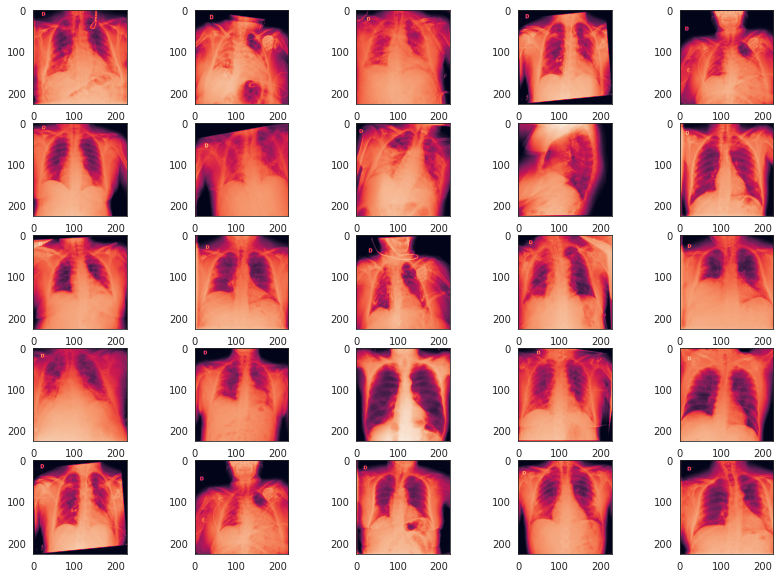

In [128]:
fig, ax = subplots(5, 5, figsize = (14, 10))
for x in range(5):
    for y in range(5):
        rn = 3*x+4*y
        ax[x,y].imshow(image_list[rn])
show()

In [0]:
labels = Full_dataframe[['Non-Pneumonia',
 'Other Pneumonia',
 'COVID-19']].reset_index(drop=True)

In [21]:
sum(Full_dataframe)

COVID-19                                                         569
Data Source        Source-2Source-2Source-2Source-2Source-2Source...
Image Name         CASE58_XRAY_1.jpegCASE58_XRAY_1.jpegCASE58_XRA...
Non-Pneumonia                                                    569
Other Pneumonia                                                  569
Partition                                                      13032
dtype: object

In [23]:
sum(labels)

Non-Pneumonia      569.0
Other Pneumonia    569.0
COVID-19           569.0
dtype: float64

In [0]:
features = np.array(image_list)
label = np.array([np.where(r==1)[0][0] for r in np.array(labels)])
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [46]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.2)
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((1365, 227, 227), (1365,)), ((342, 227, 227), (342,)))

In [0]:
def data_preprocessing(X_train, y_train, X_test, y_test, sampler = None):
  #train
  X_train = X_train.reshape(X_train.shape[0], 227, 227)
  X_test = X_test.reshape(X_test.shape[0], 227, 227)  
  train_images_tensor = torch.tensor(X_train)/255.0
  train_labels_tensor = torch.tensor(y_train)
  train_tensor = TensorDataset(train_images_tensor, train_labels_tensor)

  #val
  val_images_tensor = torch.tensor(X_test)/255.0
  val_labels_tensor = torch.tensor(y_test)
  val_tensor = TensorDataset(val_images_tensor, val_labels_tensor)

  train_loader = DataLoader(train_tensor, batch_size=16, num_workers=2, sampler = sampler)
  val_loader = DataLoader(val_tensor, batch_size=16, num_workers=2, shuffle=True)
  return train_loader, val_loader

In [0]:
train_loader, val_loader = data_preprocessing(X_train, y_train, X_test, y_test)

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv_block = nn.Sequential(
                nn.Conv2d(1, 32, kernel_size=3),
                nn.BatchNorm2d(32),
                nn.ReLU(),
                nn.MaxPool2d(2),
                nn.Conv2d(32, 64, kernel_size=3),
                nn.BatchNorm2d(64),
                nn.ReLU(),
                nn.MaxPool2d(2),
                nn.Conv2d(64, 128, kernel_size=3),
                nn.BatchNorm2d(128),
                nn.ReLU(),
        )
        
        self.linear_block = nn.Sequential(
                
                nn.Linear(359552, 128),
                nn.BatchNorm1d(128),
                ReLU(),
                nn.Linear(128, 64),
                nn.BatchNorm1d(64),
                nn.ReLU(),
                nn.Dropout(0.5),
                nn.Linear(64,10),          
        )
        
    def forward(self, x):
        x = self.conv_block(x.float())
        x = x.view(x.size(0), -1)
        x = self.linear_block(x)
        return x

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [107]:
conv_model = Net()
conv_model

Net(
  (conv_block): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
  )
  (linear_block): Sequential(
    (0): Linear(in_features=359552, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): BatchNorm1d(64, eps=1e-05, mom

In [114]:
7*32+2

226

**5. Complexity Calculation**

In [0]:
'''
Input - 1*28*28                 Parameters       Flops  
1. Conv2D(32c, 3w)                320            216320
2. BatchNorm2D(32)                 0               452
3. ReLU                            0              43264 
4. MaxPool2D(2w, 2s)               0              16224
5. Conv2D(64c, 3w, 1s, 1p)       18496           2238016
6. Batch Norm2D(64)                0               900 
7. ReLU                            0             15488
8. MaxPool2D(2w, 2s)               0             4800 
9. Conv2D(128c, 3w, 1s, 1p)       73856          664704
10. BatchNorm2D(128)               0               1796
11. ReLU                           0              2304 
12. Linear(1152, 128)             147584          147584
13. BatchNorm1D(128)               0               898
14. ReLU                           0              256
15. Linear(128, 64)               8256            8256
16. BatchNorm1D(64)                0                450        
17. ReLU                           0               128
18. Dropout                        0                0
19. Linear(64, 10)                650              650
'''

In [0]:
optimizer = optim.Adam(params=conv_model.parameters(), lr=0.03)
criterion = nn.CrossEntropyLoss()
lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
if torch.cuda.is_available():
    conv_model = conv_model.cuda()
    criterion = criterion.cuda()

In [0]:
def train_model(num_epoch):
  conv_model.train()
  lr_scheduler.step()
  # training_loss = []

  for batch_idx, (data, label) in enumerate(train_loader):
    data = data.unsqueeze(1)
    data, label = data, label
    
    if torch.cuda.is_available():
        data = data.cuda()
        label = label.cuda()
        
    optimizer.zero_grad()
    output = conv_model(data)
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()
  return loss
            
def evaluate_model(data_loader):
  conv_model.eval()
  loss = 0
  correct = 0
    
  for data, label in data_loader:
    data = data.unsqueeze(1)
    data, label = data, label
    
    if torch.cuda.is_available():
        data = data.cuda()
        label = label.cuda()
    
    data, label = data.cuda(), label.cuda() # add this line
    
    output = conv_model(data)
    
    loss += F.cross_entropy(output, label, size_average=False).data

    pred = output.data.max(1, keepdim=True)[1]
    correct += pred.eq(label.data.view_as(pred)).cpu().sum()
    
    loss /= len(data_loader.dataset)
        
  print('\nAverage Val Loss: {:.4f}, Val Accuracy: {}/{} ({:.3f}%)\n'.format(
        loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))
  return loss

def plots(training_loss_list, val_loss_list):
    plt.plot(range(len(training_loss_list)),training_loss_list,label='Train Loss')
    plt.plot(range(len(val_loss_list)),val_loss_list,label='Validation Loss')
    plt.legend()
    plt.show()

In [109]:
num_epochs = 20
training_loss_list = []
val_loss_list = []
for n in range(num_epochs):
    print("Epoch no:  " + str(n))
    training_loss_list.append(train_model(n))
    val_loss_list.append(evaluate_model(val_loader))

Epoch no:  0


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Average Val Loss: 0.0755, Val Accuracy: 110/342 (32.164%)

Epoch no:  1

Average Val Loss: 0.1703, Val Accuracy: 110/342 (32.164%)

Epoch no:  2

Average Val Loss: 0.0220, Val Accuracy: 214/342 (62.573%)

Epoch no:  3

Average Val Loss: 0.1328, Val Accuracy: 110/342 (32.164%)

Epoch no:  4

Average Val Loss: 0.0080, Val Accuracy: 238/342 (69.591%)

Epoch no:  5

Average Val Loss: 1.8058, Val Accuracy: 110/342 (32.164%)

Epoch no:  6

Average Val Loss: 0.0001, Val Accuracy: 322/342 (94.152%)

Epoch no:  7

Average Val Loss: 0.0030, Val Accuracy: 307/342 (89.766%)

Epoch no:  8

Average Val Loss: 0.0120, Val Accuracy: 324/342 (94.737%)

Epoch no:  9

Average Val Loss: 0.0001, Val Accuracy: 319/342 (93.275%)

Epoch no:  10

Average Val Loss: 0.0004, Val Accuracy: 321/342 (93.860%)

Epoch no:  11

Average Val Loss: 0.0085, Val Accuracy: 317/342 (92.690%)

Epoch no:  12

Average Val Loss: 0.0000, Val Accuracy: 323/342 (94.444%)

Epoch no:  13

Average Val Loss: 0.0013, Val Accuracy: 325/34

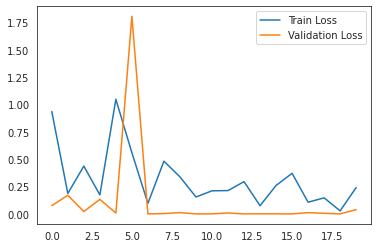

In [110]:
plt.plot(range(len(training_loss_list)),training_loss_list,label='Train Loss')
plt.plot(range(len(val_loss_list)),val_loss_list,label='Validation Loss')
plt.legend()
plt.show()